# Hex Map
There are a relatively small number of actions that are taken over the course of a game. Therefore, it is reasonable to derive a strategy, if not for the whole game play-by-play, then by organizing a handful of turns.

One overall strategy in the game is to minimize the number of times the sail action is used. This implies more turns are spent taking two *productive* actions that naturally synergize. For example, using the merchant guild means goods can be sold to acquire money to buy more goods on the same turn. Furthermore, this means sail actions will maximize moving both ships on the same turn, making the most of the movement available bewteen both ships.

A Hex Map will be a usual tool for creating a SeaFall playbook.

In [1]:
import numpy
import matplotlib
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot

The hex grid will be stored in a dictionary using 3 coordinates to define the location. 3-dimensional coordintes will be translated into a 2D plan in order to create the grid. The projection of the 3D coordinates in a hex grid *plane* will require a transformation. The plane can be determined by any two vectors defined within the hexgrid coordinate system. The two vectors that determine the plane are easily created by using any two pairs of hexgrids coordinates.

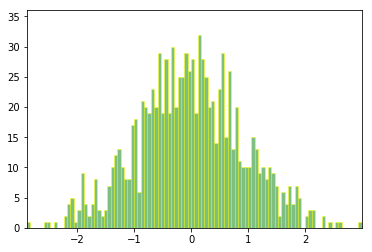

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation

fig, ax = plt.subplots()

# histogram our data with numpy
data = np.random.randn(1000)
n, bins = np.histogram(data, 100)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
nrects = len(left)

# here comes the tricky part -- we have to set up the vertex and path
# codes arrays using moveto, lineto and closepoly

# for each rect: 1 for the MOVETO, 3 for the LINETO, 1 for the
# CLOSEPOLY; the vert for the closepoly is ignored but we still need
# it to keep the codes aligned with the vertices
nverts = nrects*(1 + 3 + 1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5, 0] = left
verts[0::5, 1] = bottom
verts[1::5, 0] = left
verts[1::5, 1] = top
verts[2::5, 0] = right
verts[2::5, 1] = top
verts[3::5, 0] = right
verts[3::5, 1] = bottom

barpath = path.Path(verts, codes)
patch = patches.PathPatch(
    barpath, facecolor='green', edgecolor='yellow', alpha=0.5)
ax.add_patch(patch)

ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())


def animate(i):
    # simulate new data coming in
    data = np.random.randn(1000)
    n, bins = np.histogram(data, 100)
    top = bottom + n
    verts[1::5, 1] = top
    verts[2::5, 1] = top
    return [patch, ]

ani = animation.FuncAnimation(fig, animate, 100, repeat=False, blit=True)
plt.show()

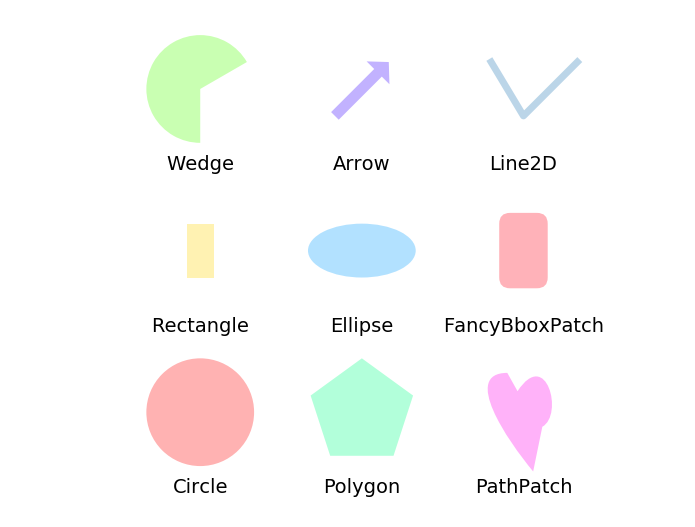

In [3]:
import matplotlib.pyplot as plt
plt.rcdefaults()

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection


def label(xy, text):
    y = xy[1] - 0.15  # shift y-value for label so that it's below the artist
    plt.text(xy[0], y, text, ha="center", family='sans-serif', size=14)


fig, ax = plt.subplots()
# create 3x3 grid to plot the artists
grid = np.mgrid[0.2:0.8:3j, 0.2:0.8:3j].reshape(2, -1).T

patches = []

# add a circle
circle = mpatches.Circle(grid[0], 0.1, ec="none")
patches.append(circle)
label(grid[0], "Circle")

# add a rectangle
rect = mpatches.Rectangle(grid[1] - [0.025, 0.05], 0.05, 0.1, ec="none")
patches.append(rect)
label(grid[1], "Rectangle")

# add a wedge
wedge = mpatches.Wedge(grid[2], 0.1, 30, 270, ec="none")
patches.append(wedge)
label(grid[2], "Wedge")

# add a Polygon
polygon = mpatches.RegularPolygon(grid[3], 5, 0.1)
patches.append(polygon)
label(grid[3], "Polygon")

# add an ellipse
ellipse = mpatches.Ellipse(grid[4], 0.2, 0.1)
patches.append(ellipse)
label(grid[4], "Ellipse")

# add an arrow
arrow = mpatches.Arrow(grid[5, 0] - 0.05, grid[5, 1] - 0.05, 0.1, 0.1, width=0.1)
patches.append(arrow)
label(grid[5], "Arrow")

# add a path patch
Path = mpath.Path
path_data = [
    (Path.MOVETO, [0.018, -0.11]),
    (Path.CURVE4, [-0.031, -0.051]),
    (Path.CURVE4, [-0.115,  0.073]),
    (Path.CURVE4, [-0.03 ,  0.073]),
    (Path.LINETO, [-0.011,  0.039]),
    (Path.CURVE4, [0.043,  0.121]),
    (Path.CURVE4, [0.075, -0.005]),
    (Path.CURVE4, [0.035, -0.027]),
    (Path.CLOSEPOLY, [0.018, -0.11])
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts + grid[6], codes)
patch = mpatches.PathPatch(path)
patches.append(patch)
label(grid[6], "PathPatch")

# add a fancy box
fancybox = mpatches.FancyBboxPatch(
    grid[7] - [0.025, 0.05], 0.05, 0.1,
    boxstyle=mpatches.BoxStyle("Round", pad=0.02))
patches.append(fancybox)
label(grid[7], "FancyBboxPatch")

# add a line
x, y = np.array([[-0.06, 0.0, 0.1], [0.05, -0.05, 0.05]])
line = mlines.Line2D(x + grid[8, 0], y + grid[8, 1], lw=5., alpha=0.3)
label(grid[8], "Line2D")

colors = np.linspace(0, 1, len(patches))
collection = PatchCollection(patches, cmap=plt.cm.hsv, alpha=0.3)
collection.set_array(np.array(colors))
ax.add_collection(collection)
ax.add_line(line)

plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.axis('equal')
plt.axis('off')

plt.show()

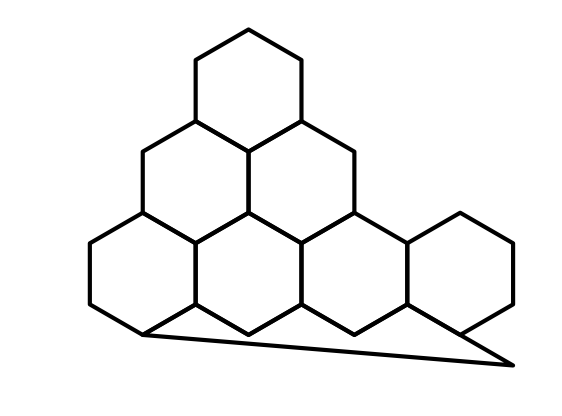

In [65]:
fig, ax = plt.subplots()
patches = []
polygon = mpatches.RegularPolygon((0,0), 6, 1/(np.sqrt(3)), 
                                  linestyle="solid",
                                  linewidth=3,
                                 color="k",
                                 fill=False)
patches.append(polygon)
polygon = mpatches.RegularPolygon((1,0), 6, 1/(np.sqrt(3)), 
                                  linestyle="solid",
                                  linewidth=3,
                                 color="k",
                                 fill=False)
patches.append(polygon)
polygon = mpatches.RegularPolygon((2,0), 6, 1/(np.sqrt(3)), 
                                  linestyle="solid",
                                  linewidth=3,
                                 color="k",
                                 fill=False)
patches.append(polygon)
polygon = mpatches.RegularPolygon((3,0), 6, 1/(np.sqrt(3)), 
                                  linestyle="solid",
                                  linewidth=3,
                                 color="k",
                                 fill=False)
patches.append(polygon)
polygon = mpatches.RegularPolygon((0.5,np.sqrt(3)/2), 6, 1/(np.sqrt(3)), 
                                  linestyle="solid",
                                  linewidth=3,
                                 color="k",
                                 fill=False)
patches.append(polygon)
polygon = mpatches.RegularPolygon((1.5,np.sqrt(3)/2), 6, 1/(np.sqrt(3)), 
                                  linestyle="solid",
                                  linewidth=3,
                                 color="k",
                                 fill=False)
patches.append(polygon)
polygon = mpatches.RegularPolygon((1.0,np.sqrt(3)), 6, 1/(np.sqrt(3)), 
                                  linestyle="solid",
                                  linewidth=3,
                                 color="k",
                                 fill=False)
patches.append(polygon)
# add a path patch
Path = mpath.Path
path_data = [
    (Path.MOVETO, [0.0, -1/(np.sqrt(3))]),
    (Path.LINETO, [0.5, -1/(2*np.sqrt(3))]),
    (Path.LINETO, [1.0,  -1/(np.sqrt(3))]),
    (Path.LINETO, [1.5, -1/(2*np.sqrt(3))]),
    (Path.LINETO, [2.0,  -1/(np.sqrt(3))]),
    (Path.LINETO, [2.5, -1/(2*np.sqrt(3))]),
    (Path.LINETO, [3.5,  -3/(2*np.sqrt(3))]),
    (Path.CLOSEPOLY, [0.0, -1/(np.sqrt(3))])
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path,                                   linestyle="solid",
                                  linewidth=3,
                                 color="k",
                                 fill=False)
patches.append(patch)
collection = PatchCollection(patches, match_original=True)
ax.add_collection(collection)
plt.axis('equal')
plt.axis('off')
plt.show()

In [ ]:
class SeafallPlayerTurn:
    def __init__(self):
        print("hello")

In [ ]:
class SeafallMapPlot:
    def __init__(self):
        print("hello")

In [ ]:
class SeafallIsland:
    def __init__(self):
        print("hello")

In [ ]:
class SeafallMap:
    def __init__(self):
        print("hello")